##**Unemployment**
Unemployment is a term referring to individuals who are employable and actively seeking a job but are unable to find a job. Included in this group are those people in the workforce who are working but do not have an appropriate job. Usually measured by the unemployment rate, which is dividing the number of unemployed people by the total number of people in the workforce, unemployment serves as one of the indicators of a country’s economic status.[Source](https://https://corporatefinanceinstitute.com/resources/knowledge/economics/unemployment/)

## **Unemployment in the United States**
Unemployment in the United States discusses the causes and measures of U.S. unemployment and strategies for reducing it. Job creation and unemployment are affected by factors such as economic conditions, global competition, education, automation, and demographics. These factors can affect the number of workers, the duration of unemployment, and wage levels. continue reading: [Wikipedia](https://en.wikipedia.org/wiki/Unemployment_in_the_United_States#:~:text=In%20September%202019%2C%20the%20U.S.,pandemic%20in%20the%20United%20States.)

# Import neccessary libraries, import data, set options.

In [1]:
#!pip install pandas_profiling --upgrade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
%matplotlib inline
plt.style.use("ggplot")

In [3]:
#general_report = ProfileReport(data)
#general_report

In [4]:
data = pd.read_csv('../input/unemployment-by-county-us/output.csv')
data.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


## Data Exploration

In [5]:
data.describe( include="all")

,Year,Month,State,County,Rate
count,885548.000000,885548,885548,885548,885548.000000
unique,NaN,12,47,1752,NaN
top,NaN,March,Texas,Washington County,NaN
freq,NaN,74540,57658,8930,NaN
mean,2003.000017,NaN,NaN,NaN,6.175010
std,7.824893,NaN,NaN,NaN,3.112535
min,1990.000000,NaN,NaN,NaN,0.000000
25%,1996.000000,NaN,NaN,NaN,4.000000
50%,2003.000000,NaN,NaN,NaN,5.500000
75%,2010.000000,NaN,NaN,NaN,7.700000


The description of the dataset

*   There are 885548 rows, 5 colums.
*   The year column represents the recorded years for the unemployment rate, the minumum year recorded is 1990 and the maximum year is 2016, this indicates the data span across 26years. 
*   The month columns contains 12 distinct values as expected there are 12months in a year. and march appears to be the most frequent month.
*  The State column consists of 47 distinct values, There are 50 states in the US, Hence, three States are not present in the data. Also Texas appears most in the data with 57658 frequency.
*   County in US mean an administrative or political subdivision of each state that consists of a geographic region with specific boundaries and usually some level of governmental authority, just like a local govwernment area, US has 3,144 counties, in the column we have 1752 distinct values. hence, not all counties are represented by the data.
*   Rate columns is the columns that indicates the unemployment rate in 47 states of the US. there is a min values of 0.00 indicating that there is a preriod in a particular states that records Zero unemployment rate and we have the max values at 58.4 which also indicates the is a peroid in a particular states that records over 50% unemployment rate.

*   Lastly, the count columns indicates there are no missing rows in the data, but let cross check.
















In [6]:
data.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

No null values!

# States Analysis

lets check for the missing states


In [7]:
state_=data.State.unique()
state_

array(['Mississippi', 'Oklahoma', 'Delaware', 'Minnesota', 'Illinois',
       'Arkansas', 'New Mexico', 'Indiana', 'Maryland', 'Louisiana',
       'Idaho', 'Wyoming', 'Tennessee', 'Arizona', 'Iowa', 'Kansas',
       'Utah', 'Virginia', 'Oregon', 'Connecticut', 'Montana',
       'California', 'Massachusetts', 'West Virginia', 'South Carolina',
       'New Hampshire', 'Wisconsin', 'Vermont', 'North Dakota',
       'Pennsylvania', 'Kentucky', 'Hawaii', 'Nebraska', 'Missouri',
       'Ohio', 'Alabama', 'Rhode Island', 'South Dakota', 'Colorado',
       'New Jersey', 'Washington', 'North Carolina', 'New York', 'Texas',
       'Nevada', 'Maine', 'Michigan'], dtype=object)

From the data, the missing states are Alaska, Florida and Georgia, although Florida is the 3rd most populous state in US, Alaska has the largest area in the US and Georgia is the 7th most populous state in the US.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


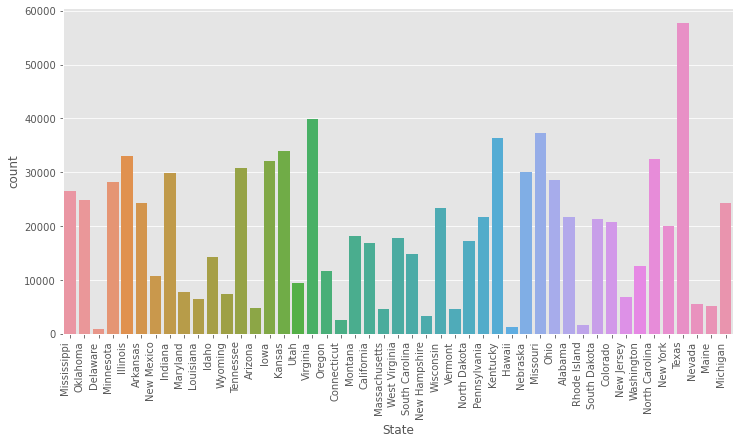

In [8]:
#Countplot on the states
plt.figure(figsize=(12,6))
g = sns.countplot(data['State'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.show()

The frequency of Texas is much more than the other states and the lowest frequency is Delaware.

Let's check for states and rate

In [9]:
#average unemployment rate per states
state_rate=data[['State', 'Rate']]
state_rate_= state_rate.groupby(['State'],as_index=False).mean()
state_rate_=state_rate_.sort_values(['Rate'], ascending=False)
state_rate_

,State,Rate
1,Arizona,9.274588
3,California,9.045005
20,Mississippi,8.320517
18,Michigan,8.136136
44,West Virginia,8.104809
43,Washington,8.031513
36,South Carolina,7.978737
33,Oregon,7.849271
14,Louisiana,7.812949
0,Alabama,7.723844


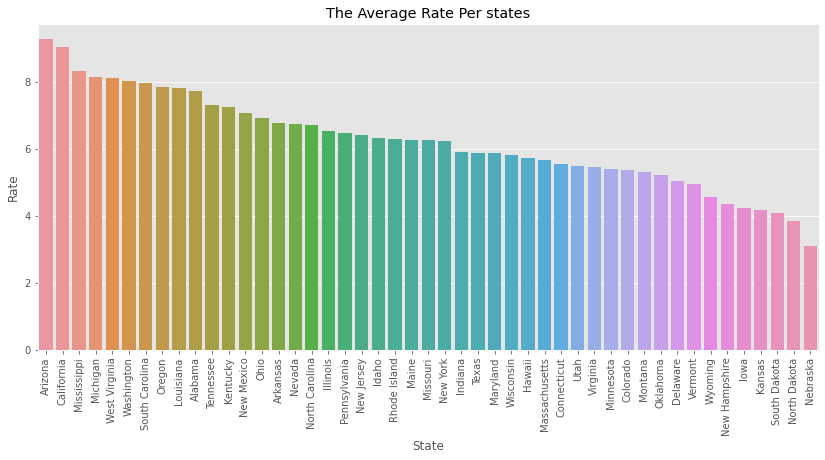

In [10]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='State', y='Rate', data=state_rate_, ax=ax)
plt.title('The Average Rate Per states')
plt.xticks(rotation='vertical')
plt.show()

Some of the Top states with high unemployment rate here are rank on top 15 lists of the poorest states in US. [source](https://safety.com/the-poorest-states-in-america)


In [11]:
max_data=pd.DataFrame(data, columns=['Year', 'Month','State','County', 'Rate'])
max_rate=max_data[max_data['Rate']>50]
max_rate

,Year,Month,State,County,Rate
240742,1991,February,Texas,Starr County,54.0
246078,1991,March,Texas,Starr County,51.3
254113,1991,January,Texas,Starr County,53.0
286921,1990,January,Texas,Starr County,52.6
337760,1992,February,Colorado,San Juan County,56.5
342958,1992,March,Colorado,San Juan County,54.9
351231,1992,January,Colorado,San Juan County,58.4
359186,1992,April,Colorado,San Juan County,53.3


 
*   The states with high unemployment rates are Texas and Colarodo between 1990-1991, 1992 respectively.
*  San Juan County in Colorado experienced the higest unemployment rate(58.4) in January, 1992.




In [12]:
min_data=pd.DataFrame(data, columns=['Year', 'Month','State','County', 'Rate'])
min_rate=max_data[min_data['Rate']<0.1]
min_rate

,Year,Month,State,County,Rate
240571,1991,February,Texas,Loving County,0.0
245907,1991,March,Texas,Loving County,0.0
253942,1991,January,Texas,Loving County,0.0
261909,1991,April,Texas,Loving County,0.0
264736,1991,December,Texas,Loving County,0.0
270072,1991,November,Texas,Loving County,0.0
275416,1990,October,Texas,McMullen County,0.0
281122,1990,August,Texas,McMullen County,0.0
283943,1990,May,Texas,McMullen County,0.0
292152,1990,September,Texas,McMullen County,0.0


The state with zero unemployment rates is Texas between 1990-1993

Interestingly, in Texas, between 1990-1991, Starr County experienced high unemployment rate and Loving County and McMullen County experienced Zero umemployment rate. same state different districts. Note, The US was just recoverng from the Early 1990 recession which lasted eight months from July 1990 to March 1991.

# Rate Column Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


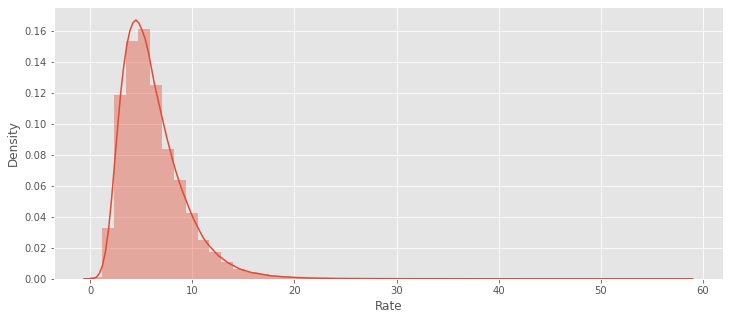

In [13]:
plt.figure(figsize=(12,5))
sns.distplot(data['Rate'])
plt.show()

The rate column is positively skewed. that is, positive skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode

---

---




 *Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution. A symmetrical distribution will have a skewness of 0.*

In [14]:
print(f'MODE:', data.Rate.mode()),
print('-'*10)
print(f'median:', data.Rate.median()),
print('-'*10)
print(f'mean:', data.Rate.mean()),
#data.Rate.()

MODE: 0    4.5
dtype: float64
----------
median: 5.5
----------
mean: 6.175009711500733


(None,)

Just confirmed the Rate is positively skewed. the mean and the median is greater than the mode.

# Data Exploration by year


In [15]:
#average unemployment rate per year
year=data[['Year', 'Rate']]
year_= year.groupby(['Year'],as_index=False).mean()
year_=year_.sort_values(['Year'], ascending=False)
year_

,Year,Rate
26,2016,5.160680
25,2015,5.401873
24,2014,6.096365
23,2013,7.211610
22,2012,7.657544
21,2011,8.523477
20,2010,9.189580
19,2009,8.883838
18,2008,5.759990
17,2007,4.896069


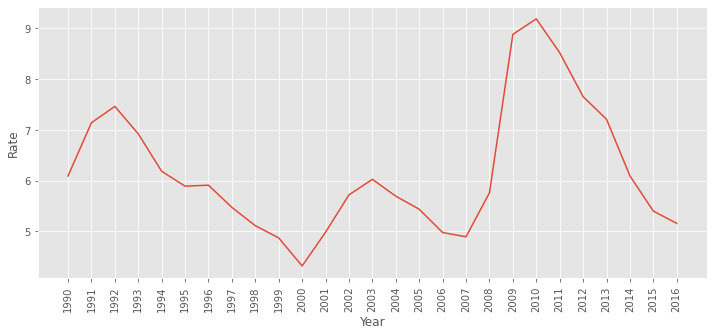

In [16]:
#check the trend
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x='Year', y='Rate', data=year_, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=data['Year'].value_counts(ascending=True).index)
plt.xticks(rotation='vertical')
plt.show()

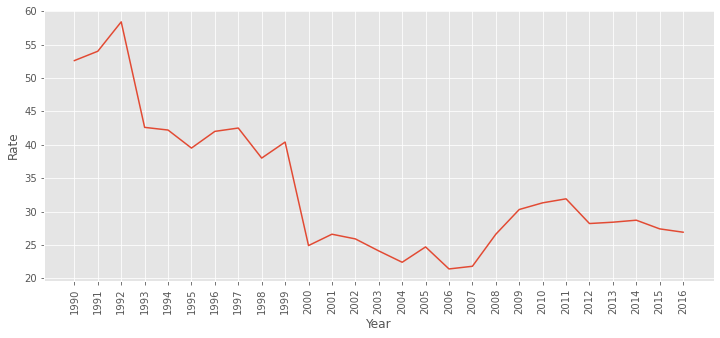

In [17]:
#check for maxumium rate in each year
year=data[['Year', 'Rate']]
year_= year.groupby(['Year'],as_index=False).max()
year_=year_.sort_values(['Year'], ascending=False)

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x='Year', y='Rate', data=year_, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=data['Year'].value_counts(ascending=True).index)
plt.xticks(rotation='vertical')
plt.show()

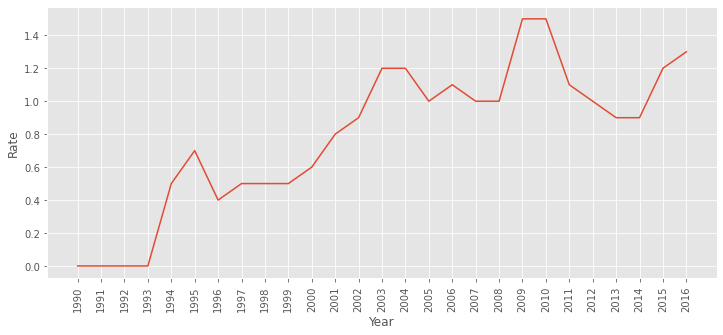

In [18]:
#check for minumium rate in each year
year=data[['Year', 'Rate']]
year_= year.groupby(['Year'],as_index=False).min()
year_=year_.sort_values(['Year'], ascending=False)

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x='Year', y='Rate', data=year_, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=data['Year'].value_counts(ascending=True).index)
plt.xticks(rotation='vertical')
plt.show()

# Data Exploration by Month

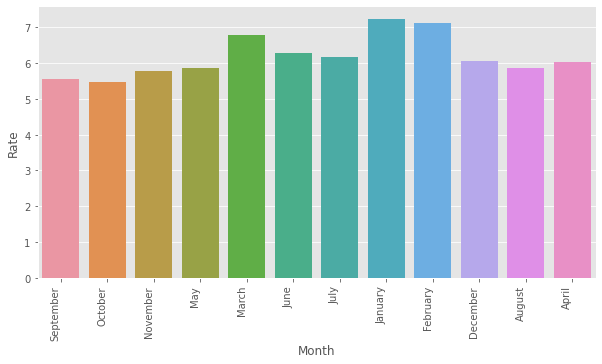

In [19]:
#check for maxumium rate in each month
Month=data[['Month', 'Rate']]
Month_= Month.groupby(['Month'],as_index=False).mean()
Month_=Month_.sort_values(['Month'], ascending=False)

plt.figure(figsize=(10,5))
g = sns.barplot(x='Month', y='Rate', data=Month_)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [20]:
county=data[['County', 'Rate']]
County_= county.groupby(['County'],as_index=False).mean()
County_=County_.sort_values(['Rate'], ascending=False)
County_

,County,Rate
752,Imperial County,23.102749
1493,Starr County,20.932159
1271,Presidio County,20.335683
984,Maverick County,19.669604
940,Luna County,17.909877
...,...,...
477,Dundy County,2.509568
461,Divide County,2.412346
811,Kearney County,2.389506
295,Cherry County,2.385185
